In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df.pivot_table(index="job_title_short", aggfunc="size")

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [4]:
df.groupby("job_title_short").size()

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [6]:
#median salary by job
df.pivot_table(values="salary_year_avg", index="job_title_short", aggfunc="median")

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Data Engineer,125000.0
Data Scientist,127500.0
Machine Learning Engineer,106415.0
Senior Data Analyst,111175.0
Senior Data Engineer,147500.0
Senior Data Scientist,155500.0


In [8]:
df.groupby("job_title_short")["salary_year_avg"].median()

job_title_short
Business Analyst              85000.0
Cloud Engineer                90000.0
Data Analyst                  90000.0
Data Engineer                125000.0
Data Scientist               127500.0
Machine Learning Engineer    106415.0
Senior Data Analyst          111175.0
Senior Data Engineer         147500.0
Senior Data Scientist        155500.0
Software Engineer             99150.0
Name: salary_year_avg, dtype: float64

In [9]:
#median salary analysis by country
df.pivot_table(values="salary_year_avg", index="job_title_short", columns="job_country", aggfunc="median")

job_country,Albania,Algeria,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bangladesh,Belarus,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vietnam,Zambia,Zimbabwe
job_title_short,,,,,,,,,,,,,,,,,,,,,
Business Analyst,NaN,NaN,71100.00,NaN,70000.0,NaN,NaN,NaN,16500.0,NaN,...,NaN,72900.0,NaN,56700.0,90000.0,NaN,NaN,79200.0,NaN,NaN
Cloud Engineer,NaN,NaN,197500.00,NaN,110000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,89100.0,NaN,NaN,116100.0,NaN,NaN,NaN,NaN,NaN
Data Analyst,49950.00,44100.0,92771.75,100500.0,109500.0,80850.00,NaN,NaN,NaN,400000.0,...,69300.0,72900.0,98500.0,87750.0,90000.0,100500.0,NaN,75550.0,NaN,63000.0
Data Engineer,NaN,45000.0,96773.00,48750.0,106712.5,147500.00,NaN,211000.0,97444.0,NaN,...,NaN,89100.0,97528.0,110000.0,125000.0,NaN,NaN,96773.0,NaN,NaN
Data Scientist,69981.25,NaN,71000.00,NaN,139216.0,71249.75,NaN,NaN,NaN,NaN,...,84200.0,131846.5,166419.5,105300.0,130000.0,NaN,30750.0,70000.0,90670.0,69085.0
Machine Learning Engineer,NaN,NaN,101029.00,87021.0,101029.0,89100.00,NaN,228750.0,69000.0,NaN,...,NaN,89100.0,62850.0,149653.0,150000.0,50000.0,NaN,57600.0,NaN,NaN
Senior Data Analyst,NaN,NaN,NaN,NaN,50640.0,89100.00,NaN,NaN,NaN,NaN,...,NaN,NaN,105837.5,111175.0,110000.0,NaN,NaN,105837.5,NaN,NaN
Senior Data Engineer,NaN,NaN,147500.00,NaN,147500.0,147500.00,NaN,173500.0,NaN,NaN,...,NaN,96773.0,NaN,147500.0,150000.0,NaN,NaN,147500.0,NaN,NaN
Senior Data Scientist,157500.00,NaN,NaN,NaN,157500.0,80850.00,NaN,NaN,NaN,NaN,...,NaN,157500.0,72000.0,157500.0,155000.0,57500.0,NaN,79200.0,NaN,NaN


In [10]:
#if you dont like wide tables then trade places of index and columns
df.pivot_table(values="salary_year_avg", index="job_country", columns="job_title_short", aggfunc="median")

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


In [12]:
top_countries = df["job_country"].value_counts().head(6).index
top_countries

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain'],
      dtype='object', name='job_country')

In [20]:
top_countries = df["job_country"].value_counts().head(6).index
df_job_country_salary = df.pivot_table(
    values = "salary_year_avg",
    index = "job_country",
    columns = "job_title_short",
    aggfunc = "median"
)

df_job_country_salary = df_job_country_salary.loc[top_countries]
job_titles = ["Data Analyst", "Data Engineer", "Data Scientist"]
df_job_country_salary = df_job_country_salary[job_titles]
df_job_country_salary

job_title_short,Data Analyst,Data Engineer,Data Scientist
job_country,,,
United States,90000.0,125000.0,130000.0
India,100500.0,147500.0,114008.0
United Kingdom,87750.0,110000.0,105300.0
France,69175.0,98301.5,88128.0
Germany,103750.0,147500.0,131560.0
Spain,91977.0,133000.0,88128.0


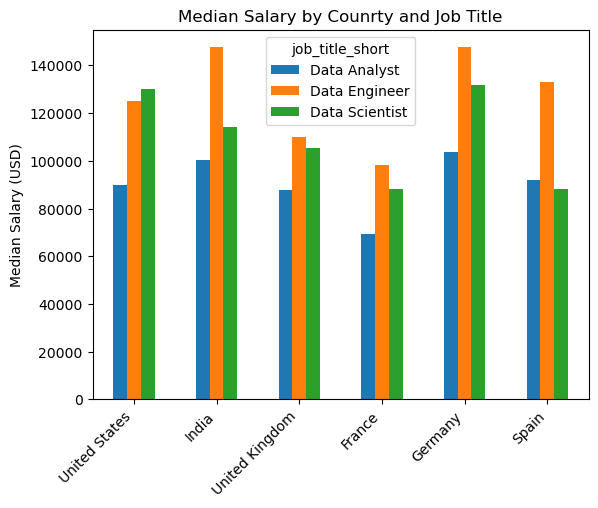

In [25]:
top_countries = df["job_country"].value_counts().head(6).index
df_job_country_salary = df.pivot_table(
    values = "salary_year_avg",
    index = "job_country",
    columns = "job_title_short",
    aggfunc = "median"
)

df_job_country_salary = df_job_country_salary.loc[top_countries]
job_titles = ["Data Analyst", "Data Engineer", "Data Scientist"]
df_job_country_salary = df_job_country_salary[job_titles]
df_job_country_salary.plot(kind="bar")
plt.ylabel("Median Salary (USD)")
plt.xlabel("")
plt.title("Median Salary by Counrty and Job Title")
plt.xticks(rotation=45, ha="right")
plt.show()